# Kaggle encore 21th titanic Competition

## 데이터 개요 (Data Description)

passengerid: 탑승자 아이디  
survived:0=사망, 1=생존  
pclass: 1=1등석, 2=2등석, 3=3등석  
name: 탑승자 이름  
gender:male=남성, female=여성  
age: 나이  
sibsp: 타이타닉 호에 동승한 자매/배우자의 수  
parch: 타이타닉 호에 동승한 부모/자식의 수  
ticket: 티켓 번호  
fare: 승객 요금  
cabin: 방 호수  
embarked: 탑승지; C=셰르부르, Q=퀴즈타운, S=사우샘프턴  

# 전역 변수 설정 (Set Global Variables)

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
plt.ion()

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
import easydict
import json
args = easydict.EasyDict()

# path 정보
args.default_path = '/Users/jhnam/workspace/playdata/encore21titanic/'

# get train and test dataset
args.train_csv = args.default_path+'train.csv'
args.test_csv = args.default_path+'test.csv'

# get submission
args.submission_csv = args.default_path+"submission.csv"

# 데이터 분석을 위한 변수들
args.random_state = 21

# 데이터 읽어오기 (Load titanic Dataset)

## Load train, test, submission

In [3]:
org_train = pd.read_csv(args.train_csv)
org_test = pd.read_csv(args.test_csv)

### train

In [4]:
print(f'{org_train.shape}')
org_train.head(5)

(916, 12)


,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,0,2,"Wheeler, Mr. Edwin Frederick""""",male,NaN,0,0,SC/PARIS 2159,12.8750,NaN,S
1,1,0,3,"Henry, Miss. Delia",female,NaN,0,0,382649,7.7500,NaN,Q
2,2,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0,1,1,12749,93.5000,B69,S
3,3,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,NaN,S
4,4,0,2,"Hold, Mr. Stephen",male,44.0,1,0,26707,26.0000,NaN,S


### test

In [5]:
print(f'{org_test.shape}')
org_test.head(5)

(393, 11)


,passengerid,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,916,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q
1,917,2,"Pinsky, Mrs. (Rosa)",female,32.0,0,0,234604,13.0000,NaN,S
2,918,3,"McCarthy, Miss. Catherine Katie""""",female,NaN,0,0,383123,7.7500,NaN,Q
3,919,3,"Franklin, Mr. Charles (Charles Fardon)",male,NaN,0,0,SOTON/O.Q. 3101314,7.2500,NaN,S
4,920,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S


### passengerid check 

In [6]:
org_train['passengerid'].nunique(), org_train.shape[0]

(916, 916)

passengerid 의 값은 중복된 값이 없다.

### drop passengerid from train and set_index passengerid from test

In [7]:
org_train.drop(['passengerid'], axis=1, inplace=True)
org_test.set_index(['passengerid'], inplace=True)

In [8]:
print(f'{org_train.shape}')
org_train.head(5)

(916, 11)


,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,2,"Wheeler, Mr. Edwin Frederick""""",male,NaN,0,0,SC/PARIS 2159,12.8750,NaN,S
1,0,3,"Henry, Miss. Delia",female,NaN,0,0,382649,7.7500,NaN,Q
2,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0,1,1,12749,93.5000,B69,S
3,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,NaN,S
4,0,2,"Hold, Mr. Stephen",male,44.0,1,0,26707,26.0000,NaN,S


In [9]:
print(f'{org_test.shape}')
org_test.head(5)

(393, 10)


,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
passengerid,,,,,,,,,,
916,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q
917,2,"Pinsky, Mrs. (Rosa)",female,32.0,0,0,234604,13.0000,NaN,S
918,3,"McCarthy, Miss. Catherine Katie""""",female,NaN,0,0,383123,7.7500,NaN,Q
919,3,"Franklin, Mr. Charles (Charles Fardon)",male,NaN,0,0,SOTON/O.Q. 3101314,7.2500,NaN,S
920,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S


In [10]:
org_train.shape, org_test.shape

((916, 11), (393, 10))

# 타겟 데이터 확인 (Target Data)

## survived

In [11]:
target = pd.Categorical(org_train['survived'])
target = target.rename_categories(['Died', 'Survived'])

target.describe()

,counts,freqs
categories,,
Died,570,0.622271
Survived,346,0.377729


# EDA

## org_train, org_test

In [12]:
org_train.head(5)

,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,2,"Wheeler, Mr. Edwin Frederick""""",male,NaN,0,0,SC/PARIS 2159,12.8750,NaN,S
1,0,3,"Henry, Miss. Delia",female,NaN,0,0,382649,7.7500,NaN,Q
2,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0,1,1,12749,93.5000,B69,S
3,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,NaN,S
4,0,2,"Hold, Mr. Stephen",male,44.0,1,0,26707,26.0000,NaN,S


In [13]:
org_test.head(5)

,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
passengerid,,,,,,,,,,
916,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q
917,2,"Pinsky, Mrs. (Rosa)",female,32.0,0,0,234604,13.0000,NaN,S
918,3,"McCarthy, Miss. Catherine Katie""""",female,NaN,0,0,383123,7.7500,NaN,Q
919,3,"Franklin, Mr. Charles (Charles Fardon)",male,NaN,0,0,SOTON/O.Q. 3101314,7.2500,NaN,S
920,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S


## heatmap

<Axes: >

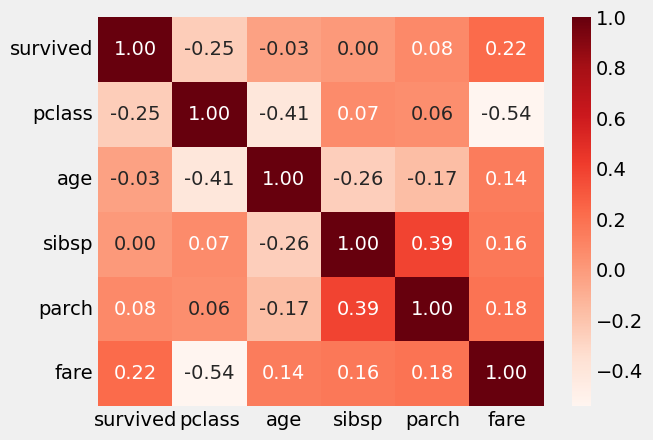

In [14]:
sns.heatmap(org_train.corr(), annot=True, fmt = ".2f", cmap = "Reds")

## 범주형 데이터 분석

1. name  
2. gender  
    - 남성(male)보다 여성(female)의 생존률이 비교적 높은 것을 알 수 있다.  
3. ticket  
4. cabin  
5. embarked  
    - embarked 에 따라 pclass 의 수가 다르고 pclass 3이 많은 'S' 에서 사망률이 높다.
6. survived  

### object type

In [15]:
df_object = org_train.select_dtypes(exclude=np.number)

df_object = df_object.join(org_train['survived'])
df_object['survived'] = df_object['survived'].astype('object')
df_object.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      916 non-null    object
 1   gender    916 non-null    object
 2   ticket    916 non-null    object
 3   cabin     198 non-null    object
 4   embarked  915 non-null    object
 5   survived  916 non-null    object
dtypes: object(6)
memory usage: 43.1+ KB


In [16]:
df_object.head()

,name,gender,ticket,cabin,embarked,survived
0,"Wheeler, Mr. Edwin Frederick""""",male,SC/PARIS 2159,NaN,S,0
1,"Henry, Miss. Delia",female,382649,NaN,Q,0
2,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,12749,B69,S,1
3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,350043,NaN,S,1
4,"Hold, Mr. Stephen",male,26707,NaN,S,0


In [17]:
df_object.describe()

,name,gender,ticket,cabin,embarked,survived
count,916,916,916,198,915,916
unique,915,2,703,146,3,2
top,"Connolly, Miss. Kate",male,CA. 2343,G6,S,0
freq,2,589,7,4,645,570


모든 object 타입의 데이터는 명목형 데이터 인것을 확인할 수 있다.

### gender

Text(0.5, 1.0, 'Survived by Gender')

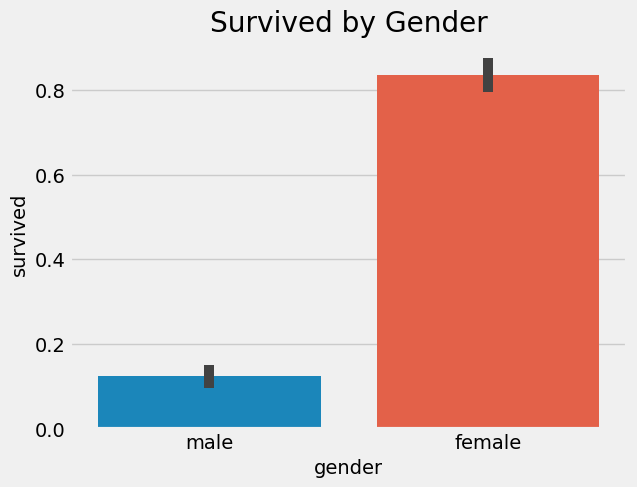

In [18]:
sbp = sns.barplot(x = "gender", y = "survived", data = df_object)
sbp.set_title("Survived by Gender")

- 남성(male)보다 여성(female)의 생존률이 비교적 높은 것을 알 수 있다.

In [19]:
pd.crosstab(df_object["gender"], df_object["survived"], margins = True) 

survived,0,1,All
gender,,,
female,54,273,327
male,516,73,589
All,570,346,916


### name

In [20]:
df_object['name'].isnull().sum()

0

### ticket

In [21]:
df_object['ticket'].nunique()

703

### cabin

Deck

A, B and C : 1st class  
D, E : all class   
F, G : 2, 3 Class  

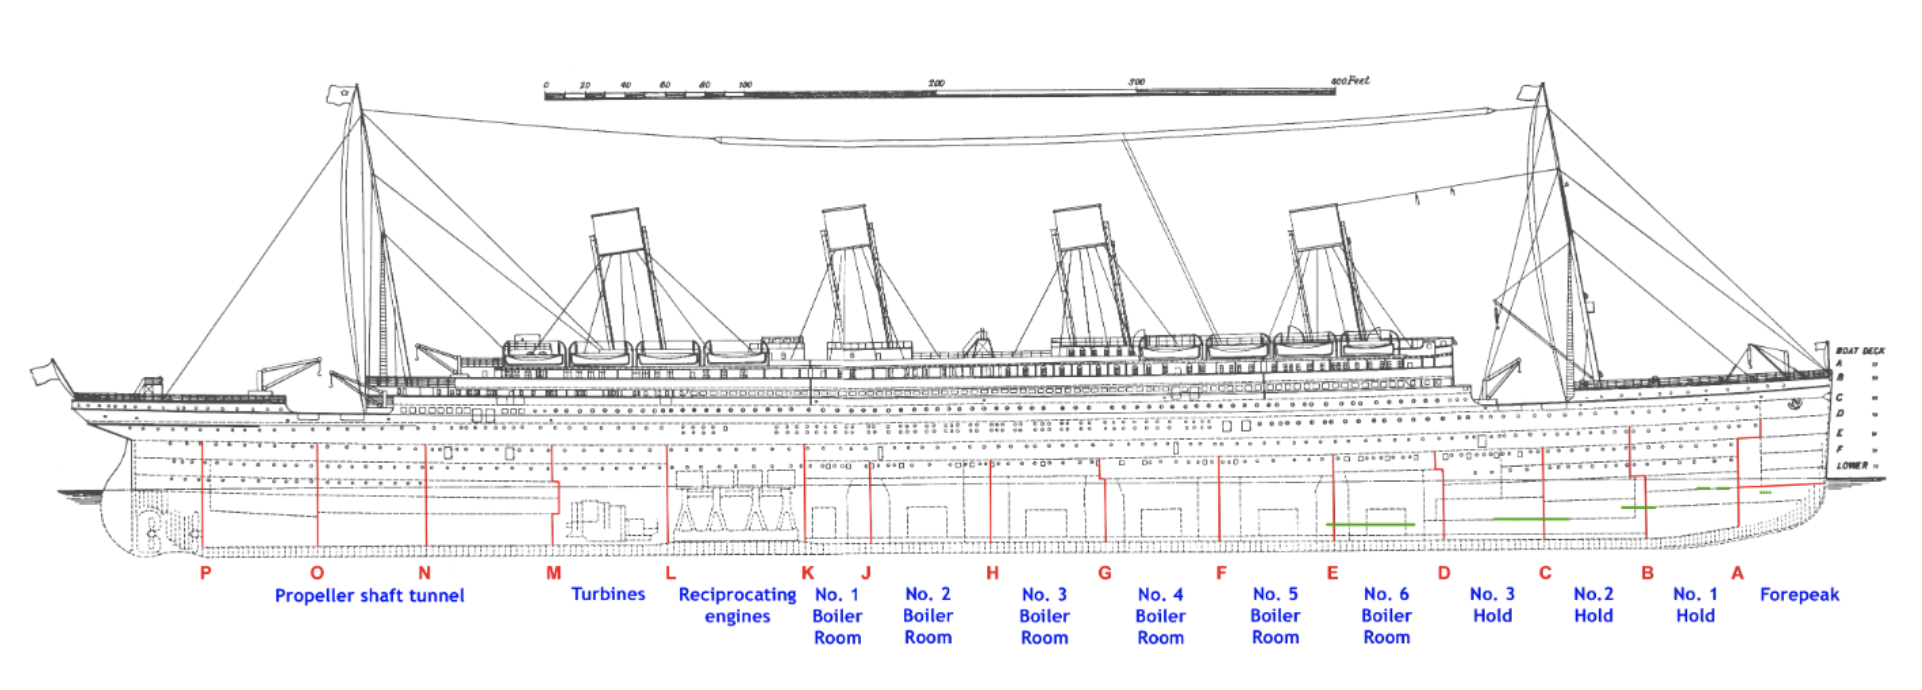

선박의 앞부터 침몰되었다고 한다.  
그래서 선박의 A 부분 부터 침몰되었는데 A 부분의 사람들의 클래스 등급이 높고 먼저 인지했을 것을 생각하면 생존률이 높을 것이라고 생각한다.  
그리고 뒤로 갈수록 등석이 낮아지고 등석이 낮아질수록 생존률이 낮은 것을 확인할 수 있다.

In [22]:
df_object['cabin'].describe()

count     198
unique    146
top        G6
freq        4
Name: cabin, dtype: object

In [23]:
df_object['cabin'].nunique()

146

In [24]:
df_object['cabin'].unique()

array([nan, 'B69', 'A34', 'D28', 'B96 B98', 'B37', 'C54', 'D20', 'D9',
       'A11', 'A6', 'E121', 'A19', 'C7', 'A10', 'F33', 'B58 B60',
       'B57 B59 B63 B66', 'G6', 'E25', 'C104', 'C92', 'C86', 'A24', 'D33',
       'E40', 'E63', 'C78', 'D26', 'E49', 'D48', 'C148', 'C51', 'E34',
       'B80', 'B26', 'E33', 'D50', 'B101', 'B51 B53 B55', 'C31', 'C111',
       'D7', 'B86', 'C23 C25 C27', 'C106', 'B45', 'F G63', 'E24',
       'C55 C57', 'E17', 'C47', 'E39 E41', 'D6', 'C93', 'C95', 'C130',
       'D35', 'C123', 'C110', 'C126', 'B20', 'F2', 'C101', 'A21', 'C32',
       'C6', 'D17', 'B78', 'T', 'D10 D12', 'B35', 'E46', 'B36', 'B28',
       'E101', 'B22', 'D37', 'B77', 'E36', 'C118', 'C80', 'C53', 'E58',
       'B49', 'C125', 'E31', 'D43', 'D36', 'B38', 'C65', 'C116', 'C52',
       'A18', 'B41', 'E45', 'C2', 'C62 C64', 'B79', 'C83', 'D19', 'C68',
       'B94', 'D', 'C124', 'B42', 'D49', 'B4', 'C87', 'A31', 'E8',
       'F E69', 'E77', 'A20', 'B73', 'E50', 'E44', 'C91', 'C22 C26',
       'A3

In [25]:
df_object['cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'UNKNOWN').unique()

array(['UNKNOWN', 'B', 'A', 'D', 'C', 'E', 'F', 'G', 'T'], dtype=object)

In [26]:
df_object['deck'] = df_object['cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'UNKNOWN')
df_object['deck']

0      UNKNOWN
1      UNKNOWN
2            B
3      UNKNOWN
4      UNKNOWN
        ...   
911    UNKNOWN
912    UNKNOWN
913    UNKNOWN
914    UNKNOWN
915    UNKNOWN
Name: deck, Length: 916, dtype: object

Text(0.5, 1.0, 'Survived by deck')

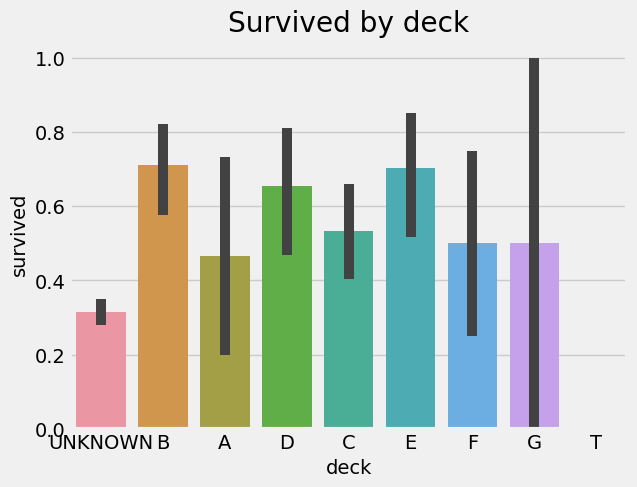

In [27]:
ds = sns.barplot(x = "deck", y = "survived", data = df_object)
ds.set_title("Survived by deck")

### embarked

In [28]:
print(f"embarked unique = {df_object['embarked'].nunique()}")
print(f"embarked nique = {df_object['embarked'].unique()}")

embarked unique = 3
embarked nique = ['S' 'Q' 'C' nan]


In [29]:
df_object['embarked'].mode()

0    S
Name: embarked, dtype: object

In [30]:
df_object['embarked'].value_counts()

S    645
C    189
Q     81
Name: embarked, dtype: int64

In [31]:
df_object['embarked'].value_counts(normalize=True)

S    0.704918
C    0.206557
Q    0.088525
Name: embarked, dtype: float64

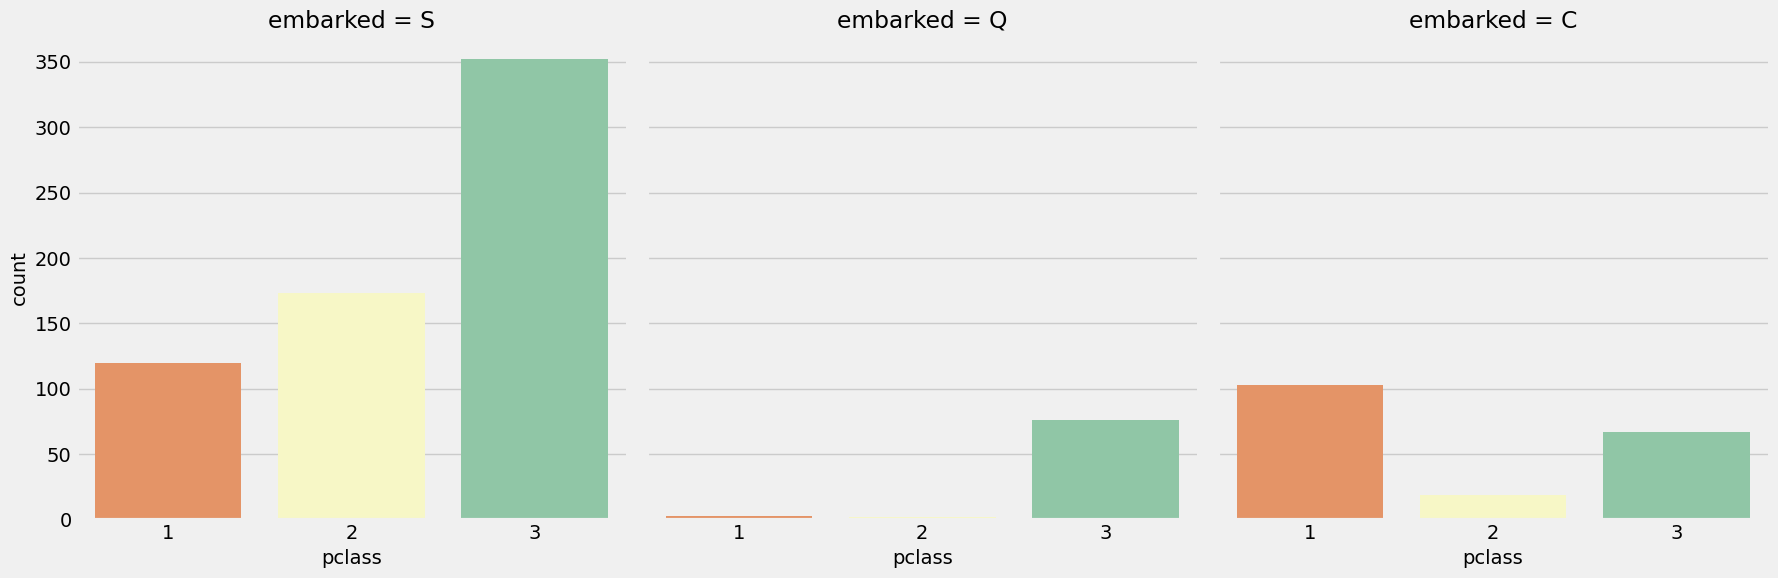

In [32]:
embp = sns.catplot(x="pclass", data=org_train, height=6, kind="count", palette="Spectral", col='embarked')
embp = embp.set_ylabels("count")

- embarked 에 따라 pclass 의 수가 다르고 pclass 3이 많은 'S' 에서 사망률이 높다.

## 수치형 데이터 분석

### number type

In [33]:
df_num = org_train.select_dtypes(include=np.number)
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  916 non-null    int64  
 1   pclass    916 non-null    int64  
 2   age       736 non-null    float64
 3   sibsp     916 non-null    int64  
 4   parch     916 non-null    int64  
 5   fare      916 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 43.1 KB


### pclass

Text(0.5, 1.0, 'Survived by pclass')

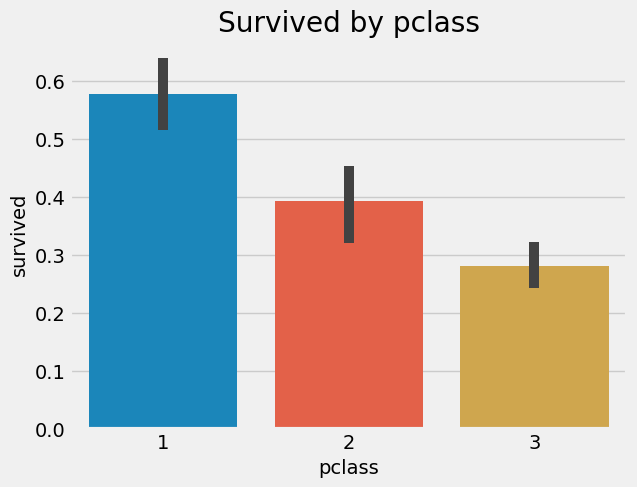

In [34]:
ps = sns.barplot(x = "pclass", y = "survived", data = df_num)
ps.set_title("Survived by pclass")

In [35]:
pd.crosstab(df_num["pclass"], df_object["survived"], margins = True) 

survived,0,1,All
pclass,,,
1,96,131,227
2,118,76,194
3,356,139,495
All,570,346,916


- 등석(pclass)이 높을수록 생존률이 높다.  

### age

In [36]:
df_num['age'].describe()

count    736.000000
mean      29.698370
std       14.185627
min        0.170000
25%       21.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

In [37]:
df_num['age'].kurt()

0.414327458430233

<Axes: ylabel='Frequency'>

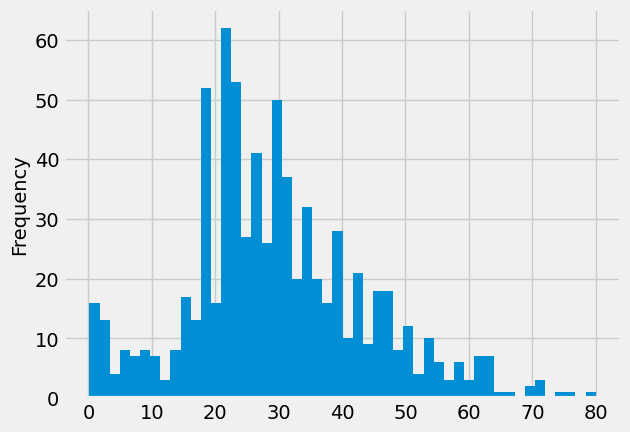

In [38]:
df_num['age'].plot.hist(bins=50)

In [39]:
df_num['age'].skew()

0.4663303747733262

<Axes: ylabel='Frequency'>

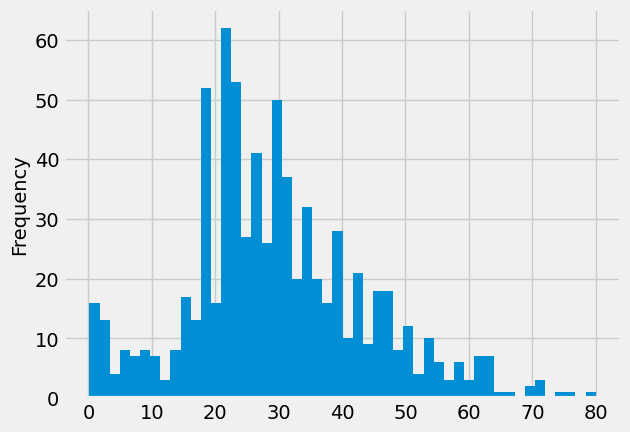

In [40]:
df_num['age'].plot.hist(bins=50)

<Axes: ylabel='age'>

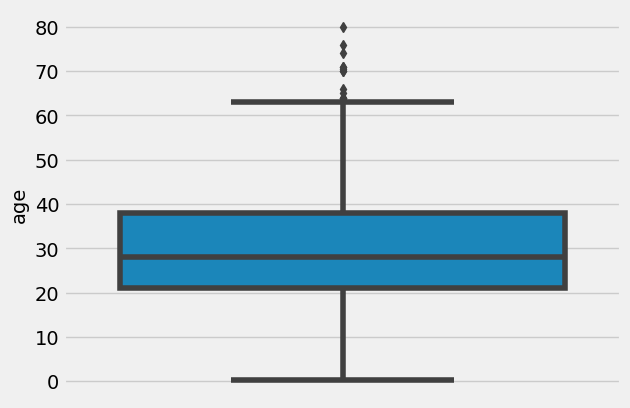

In [41]:
sns.boxplot(y=df_num['age'], data=df_num)

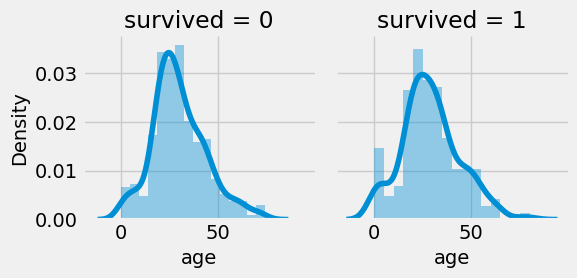

In [42]:
ages = sns.FacetGrid(df_num, col='survived')
ages.map(sns.distplot, "age")

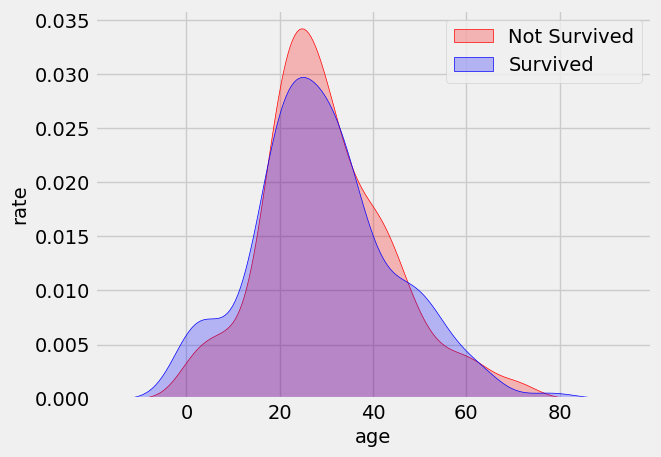

In [43]:
agsu = sns.kdeplot(df_num["age"][(df_num["survived"] == 0) & (df_num["age"].notnull())], color="Red", shade = True)
agsu = sns.kdeplot(df_num["age"][(df_num["survived"] == 1) & (df_num["age"].notnull())], ax =agsu, color="Blue", shade= True)
agsu.set_xlabel("age")
agsu.set_ylabel("rate")
agsu.legend(["Not Survived","Survived"])

In [44]:
pd.crosstab(df_num["age"], df_object["survived"], margins = True) 

survived,0,1,All
age,,,
0.17,0,1,1
0.33,1,0,1
0.67,0,1,1
0.75,1,2,3
0.83,1,1,2
...,...,...,...
71.0,2,0,2
74.0,1,0,1
76.0,0,1,1


# 데이터 분리

In [45]:
X = org_train.drop('survived', axis=1)
y = org_train['survived']

In [46]:
from sklearn.model_selection import train_test_split

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = args.random_state)

In [47]:
X_tr.shape, X_te.shape, y_tr.shape, y_te.shape

((732, 10), (184, 10), (732,), (184,))

# 데이터 전처리 (Data Proprecessing)

In [48]:
pp_tr = X_tr.copy()
pp_te = X_te.copy()
pp_ot = org_test.copy()

pp_dfs = [pp_tr, pp_te, pp_ot]

In [49]:
pp_tr.shape, pp_te.shape, pp_ot.shape

((732, 10), (184, 10), (393, 10))

## train, target, test Info

In [50]:
pp_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 732 entries, 38 to 277
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    732 non-null    int64  
 1   name      732 non-null    object 
 2   gender    732 non-null    object 
 3   age       589 non-null    float64
 4   sibsp     732 non-null    int64  
 5   parch     732 non-null    int64  
 6   ticket    732 non-null    object 
 7   fare      732 non-null    float64
 8   cabin     158 non-null    object 
 9   embarked  732 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 62.9+ KB


In [51]:
pp_te.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184 entries, 485 to 47
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    184 non-null    int64  
 1   name      184 non-null    object 
 2   gender    184 non-null    object 
 3   age       147 non-null    float64
 4   sibsp     184 non-null    int64  
 5   parch     184 non-null    int64  
 6   ticket    184 non-null    object 
 7   fare      184 non-null    float64
 8   cabin     40 non-null     object 
 9   embarked  183 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 15.8+ KB


In [52]:
pp_ot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 916 to 1308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    393 non-null    int64  
 1   name      393 non-null    object 
 2   gender    393 non-null    object 
 3   age       310 non-null    float64
 4   sibsp     393 non-null    int64  
 5   parch     393 non-null    int64  
 6   ticket    393 non-null    object 
 7   fare      392 non-null    float64
 8   cabin     97 non-null     object 
 9   embarked  392 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 33.8+ KB


## Drop Values

- 범주의 개수가 비정상적으로 많거나 생존율과 연관성이 거의 없는 value drop

### nunique check

In [53]:
pp_tr.nunique()

pclass        3
name        731
gender        2
age          90
sibsp         7
parch         8
ticket      583
fare        229
cabin       123
embarked      3
dtype: int64

In [54]:
pp_te.nunique()

pclass        3
name        184
gender        2
age          55
sibsp         7
parch         3
ticket      167
fare        101
cabin        38
embarked      3
dtype: int64

In [55]:
pp_ot.nunique()

pclass        3
name        393
gender        2
age          75
sibsp         7
parch         7
ticket      345
fare        168
cabin        86
embarked      3
dtype: int64

### drop ticket

- ticket 은 비정상적으로 범주가 많아 drop

In [56]:
pp_tr['ticket'].nunique()

583

In [57]:
for df in pp_dfs:
    df.drop(['ticket'], axis=1, inplace=True)

In [58]:
for df in pp_dfs:
    print(df.shape)

(732, 9)
(184, 9)
(393, 9)


In [59]:
pp_tr.head(5)

,pclass,name,gender,age,sibsp,parch,fare,cabin,embarked
38,2,"Andrew, Mr. Edgardo Samuel",male,18.0,0,0,11.500,NaN,S
304,1,"Dick, Mrs. Albert Adrian (Vera Gillespie)",female,17.0,1,0,57.000,B20,S
360,3,"Ilmakangas, Miss. Pieta Sofia",female,25.0,1,0,7.925,NaN,S
506,3,"Rommetvedt, Mr. Knud Paust",male,NaN,0,0,7.775,NaN,S
695,3,"Tikkanen, Mr. Juho",male,32.0,0,0,7.925,NaN,S


### Add deck and drop cabin

- cabin 의 앞 문자를 가져와서 선박의 위치를 가져와서 deck 을 만듬

In [60]:
pp_tr['cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'unknown').unique()

array(['unknown', 'B', 'C', 'E', 'D', 'F', 'G', 'A', 'T'], dtype=object)

In [61]:
for df in pp_dfs:
    df['deck'] = df['cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'unknown')
    df.drop(['cabin'], axis=1, inplace=True)
    
pp_tr['deck'].isnull().sum(), pp_te['deck'].isnull().sum(), pp_ot['deck'].isnull().sum()

(0, 0, 0)

In [62]:
pp_tr.isnull().sum()

pclass        0
name          0
gender        0
age         143
sibsp         0
parch         0
fare          0
embarked      0
deck          0
dtype: int64

## Missing Values

### missing values check

In [63]:
pp_tr.isnull().sum()

pclass        0
name          0
gender        0
age         143
sibsp         0
parch         0
fare          0
embarked      0
deck          0
dtype: int64

In [64]:
pp_te.isnull().sum()

pclass       0
name         0
gender       0
age         37
sibsp        0
parch        0
fare         0
embarked     1
deck         0
dtype: int64

In [65]:
pp_ot.isnull().sum()

pclass       0
name         0
gender       0
age         83
sibsp        0
parch        0
fare         1
embarked     1
deck         0
dtype: int64

<Axes: >

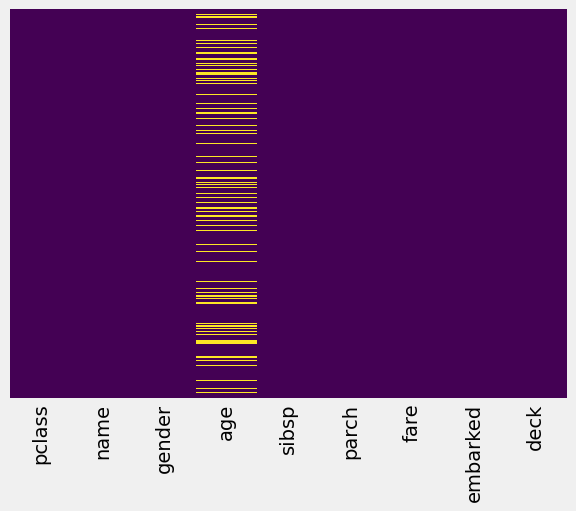

In [66]:
sns.heatmap(pp_tr.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

### age

In [67]:
pp_tr['age'].skew(), pp_tr['age'].kurt()

(0.5615238146229974, 0.5166808558712463)

<Axes: ylabel='age'>

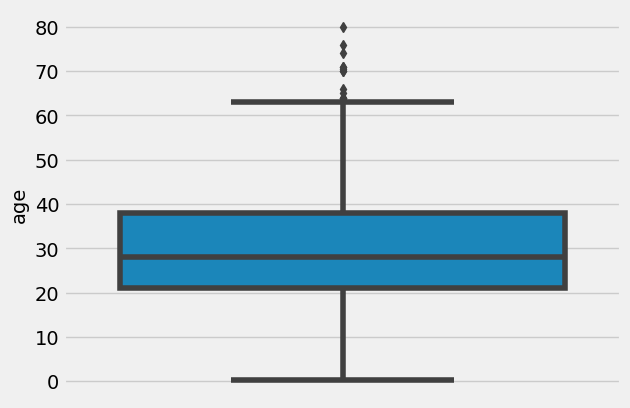

In [68]:
sns.boxplot(y=pp_tr['age'], data=df)

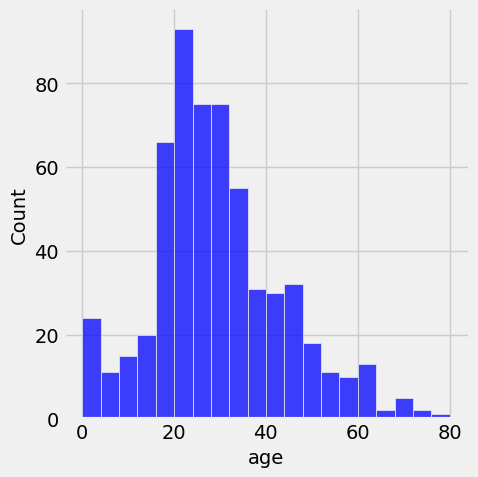

In [69]:
sns.displot(pp_tr["age"], color="b", label="Skewness : %.2f"%(pp_tr["age"].skew()))

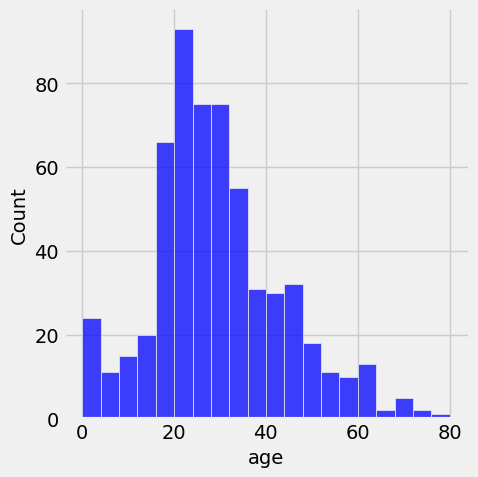

In [70]:
sns.displot(pp_tr["age"], color="b", label="Skewness : %.2f"%(pp_tr["age"].skew()))

<Axes: xlabel='survived', ylabel='age'>

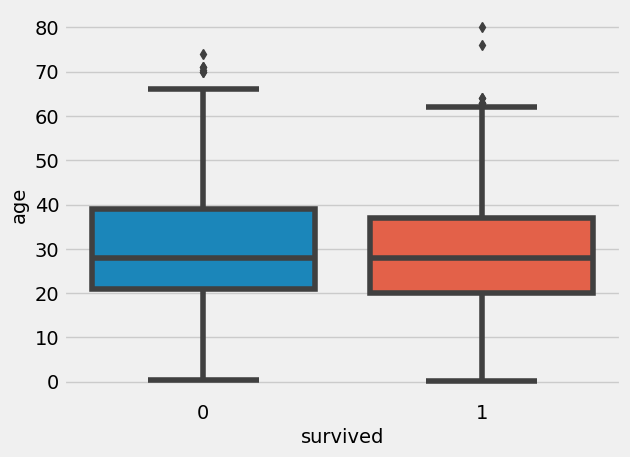

In [71]:
sns.boxplot(x=org_train['survived'], y=org_train['age'], data=org_train)

#### random sampling

In [72]:
def random_sampling(df:pd.DataFrame):
    # random sampling
    random_sampling = (df['age'].dropna().sample(df['age'].isnull().sum()))
    random_sampling.index = df[lambda x: x['age'].isnull()].index # index 부여

    # NA imputation
    df.loc[df['age'].isnull(), 'age'] = random_sampling

    # 확인
    print("After random sampling = ", df['age'].isnull().sum())
    
for df in pp_dfs:
    random_sampling(df)

After random sampling =  0
After random sampling =  0
After random sampling =  0


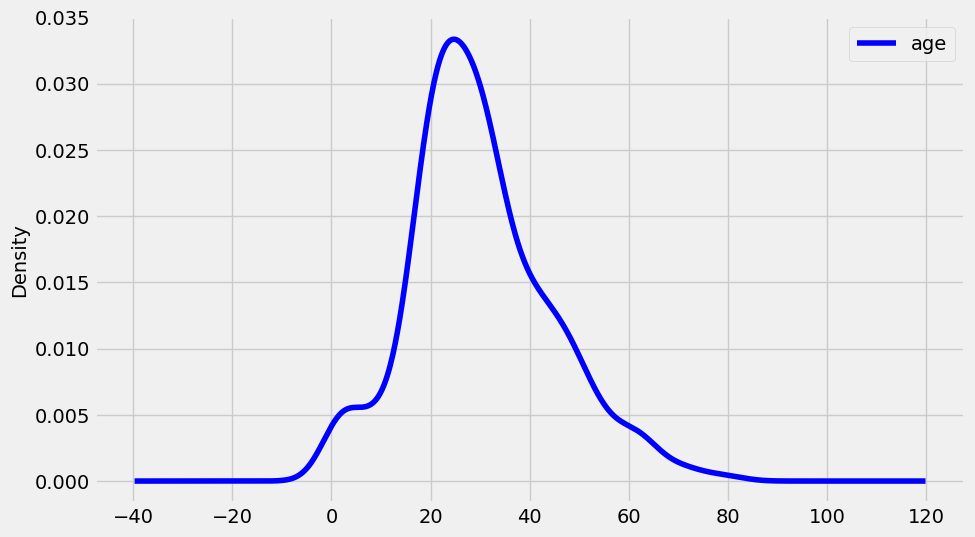

In [73]:
# 분포 시각화
fig, ax = plt.subplots(figsize=(10,6))

pp_tr['age'].plot(kind='kde', ax=ax, color='blue')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### fare

In [74]:
pp_tr.groupby('pclass').agg({"fare":"mean"})

,fare
pclass,
1,85.737219
2,20.461179
3,13.646288


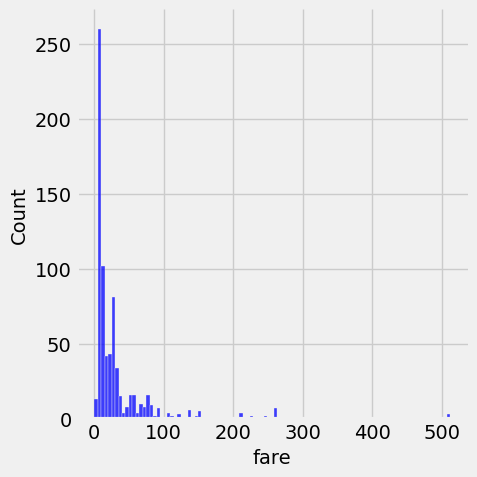

In [75]:
sns.displot(pp_tr["fare"], color="b", label="Skewness : %.2f"%(pp_tr["fare"].skew()))

In [76]:
def random_sampling(df:pd.DataFrame):
    # random sampling
    random_sampling = (df['fare'].dropna().sample(df['fare'].isnull().sum()))
    random_sampling.index = df[lambda x: x['fare'].isnull()].index # index 부여

    # NA imputation
    df.loc[df['fare'].isnull(), 'fare'] = random_sampling

    # 확인
    print("After random sampling = ", df['fare'].isnull().sum())
    
for df in pp_dfs:
    random_sampling(df)

After random sampling =  0
After random sampling =  0
After random sampling =  0


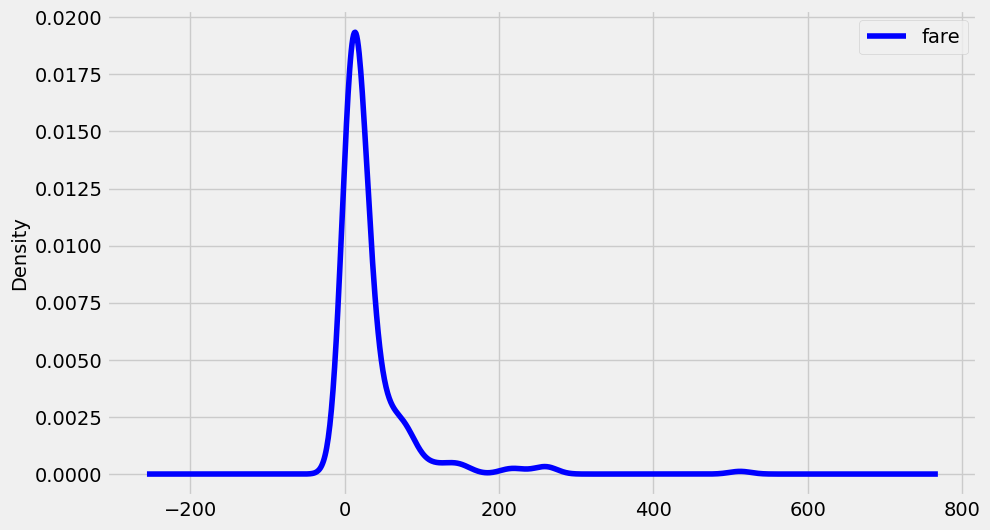

In [77]:
# 분포 시각화
fig, ax = plt.subplots(figsize=(10,6))

pp_tr['fare'].plot(kind='kde', ax=ax, color='blue')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### embarked

In [78]:
for df in pp_dfs:
    embarked_mode = df['embarked'].mode().values[0]
    df['embarked'].fillna(embarked_mode, inplace=True)

## Feature

In [79]:
print(f"{pp_tr.shape} / {pp_te.shape} / {pp_ot.shape}")
pp_tr.head(5)

(732, 9) / (184, 9) / (393, 9)


,pclass,name,gender,age,sibsp,parch,fare,embarked,deck
38,2,"Andrew, Mr. Edgardo Samuel",male,18.0,0,0,11.500,S,unknown
304,1,"Dick, Mrs. Albert Adrian (Vera Gillespie)",female,17.0,1,0,57.000,S,B
360,3,"Ilmakangas, Miss. Pieta Sofia",female,25.0,1,0,7.925,S,unknown
506,3,"Rommetvedt, Mr. Knud Paust",male,39.0,0,0,7.775,S,unknown
695,3,"Tikkanen, Mr. Juho",male,32.0,0,0,7.925,S,unknown


### Add  designation

In [80]:
for df in pp_dfs:
    df['title'] = df['name'].str.extract('([A-Za-z]+)\.')
    
pp_tr['title'].value_counts()

Mr          423
Miss        145
Mrs         117
Master       30
Rev           4
Col           3
Dr            3
Major         2
Mlle          1
Sir           1
Capt          1
Ms            1
Jonkheer      1
Name: title, dtype: int64

In [81]:
pp_tr.head(5)

,pclass,name,gender,age,sibsp,parch,fare,embarked,deck,title
38,2,"Andrew, Mr. Edgardo Samuel",male,18.0,0,0,11.500,S,unknown,Mr
304,1,"Dick, Mrs. Albert Adrian (Vera Gillespie)",female,17.0,1,0,57.000,S,B,Mrs
360,3,"Ilmakangas, Miss. Pieta Sofia",female,25.0,1,0,7.925,S,unknown,Miss
506,3,"Rommetvedt, Mr. Knud Paust",male,39.0,0,0,7.775,S,unknown,Mr
695,3,"Tikkanen, Mr. Juho",male,32.0,0,0,7.925,S,unknown,Mr


In [82]:
dict_designation = {
    # 일반 호칭
    'Mr': 'others', # 남성, 혼인 여부 상관 없음
    'Miss': 'others', # 미혼 여성
    'Mrs': 'others', # 기혼 여성
    # 직업
    'Dr': 'special', # '의사'
    'Rev': 'special', # '목사'
    'Capt': 'special', # '군인'   
    'Col': 'special', # '군인'    
    'Master': 'special', # 계급
    'Major': 'special', # 계급
    # 귀족
    'Countess': 'royalty', # '백작부인'
    'Jonkheer': 'royalty' # '귀족'
}

def add_designation(title): # 호칭 함수
    designation = "others"
    try:
        designation = dict_designation[title]
    except:
        pass
    return designation

for df in pp_dfs:
    df['designation'] = df['title'].map(lambda x: add_designation(x))
    df.drop(['name','title'], axis=1, inplace=True)

In [83]:
pp_tr['designation'].unique(), pp_te['designation'].unique(), pp_ot['designation'].unique()

(array(['others', 'special', 'royalty'], dtype=object),
 array(['others', 'special', 'royalty'], dtype=object),
 array(['others', 'special'], dtype=object))

In [84]:
print(f"{pp_tr.shape} / {pp_te.shape} / {pp_ot.shape}")
pp_tr.head(5)

(732, 9) / (184, 9) / (393, 9)


,pclass,gender,age,sibsp,parch,fare,embarked,deck,designation
38,2,male,18.0,0,0,11.500,S,unknown,others
304,1,female,17.0,1,0,57.000,S,B,others
360,3,female,25.0,1,0,7.925,S,unknown,others
506,3,male,39.0,0,0,7.775,S,unknown,others
695,3,male,32.0,0,0,7.925,S,unknown,others


In [85]:
pp_tr[pp_tr["designation"]==""]

,pclass,gender,age,sibsp,parch,fare,embarked,deck,designation


### Add gender_in_pclass

In [86]:
pd.crosstab([pp_tr["gender"], pp_tr['pclass']], org_train["survived"], margins = True)

survived         0    1  All
gender pclass               
female 1         1   79   80
       2         4   59   63
       3        40   81  121
male   1        71   26   97
       2        91    7   98
       3       249   24  273
All            456  276  732

In [87]:
for df in pp_dfs:
    df['gender_in_pclass'] = df.apply(lambda x: x['gender'] + str(x['pclass']), axis=1)

In [88]:
print(f"{pp_tr.shape} / {pp_te.shape} / {pp_ot.shape}")
pp_tr.head(5)

(732, 10) / (184, 10) / (393, 10)


,pclass,gender,age,sibsp,parch,fare,embarked,deck,designation,gender_in_pclass
38,2,male,18.0,0,0,11.500,S,unknown,others,male2
304,1,female,17.0,1,0,57.000,S,B,others,female1
360,3,female,25.0,1,0,7.925,S,unknown,others,female3
506,3,male,39.0,0,0,7.775,S,unknown,others,male3
695,3,male,32.0,0,0,7.925,S,unknown,others,male3


In [89]:
pd.crosstab(pp_tr["gender_in_pclass"], org_train["survived"], margins = True).T

gender_in_pclass,female1,female2,female3,male1,male2,male3,All
survived,,,,,,,
0,1,4,40,71,91,249,456
1,79,59,81,26,7,24,276
All,80,63,121,97,98,273,732


In [90]:
pp_tr["gender_in_pclass"].unique(), pp_te["gender_in_pclass"].unique(), pp_ot["gender_in_pclass"].unique()

(array(['male2', 'female1', 'female3', 'male3', 'female2', 'male1'],
       dtype=object),
 array(['male1', 'female1', 'male2', 'female3', 'male3', 'female2'],
       dtype=object),
 array(['female3', 'female2', 'male3', 'female1', 'male2', 'male1'],
       dtype=object))

In [91]:
pp_tr[pp_tr["gender_in_pclass"]==""]

,pclass,gender,age,sibsp,parch,fare,embarked,deck,designation,gender_in_pclass


In [92]:
pp_te[pp_te["gender_in_pclass"]==""]

,pclass,gender,age,sibsp,parch,fare,embarked,deck,designation,gender_in_pclass


In [93]:
pp_ot[pp_ot["gender_in_pclass"]==""]

,pclass,gender,age,sibsp,parch,fare,embarked,deck,designation,gender_in_pclass
passengerid,,,,,,,,,,


### Add sub_age

In [94]:
for df in pp_dfs:
    df['sub_age'] = df['age'] // 10

In [95]:
pp_tr.head(5)

,pclass,gender,age,sibsp,parch,fare,embarked,deck,designation,gender_in_pclass,sub_age
38,2,male,18.0,0,0,11.500,S,unknown,others,male2,1.0
304,1,female,17.0,1,0,57.000,S,B,others,female1,1.0
360,3,female,25.0,1,0,7.925,S,unknown,others,female3,2.0
506,3,male,39.0,0,0,7.775,S,unknown,others,male3,3.0
695,3,male,32.0,0,0,7.925,S,unknown,others,male3,3.0


In [96]:
pd.crosstab(pp_tr["sub_age"], org_train["survived"], margins = True).T

sub_age,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,All
survived,,,,,,,,,,
0,28,63,154,101,72,19,13,6,0,456
1,19,39,88,69,28,22,8,1,2,276
All,47,102,242,170,100,41,21,7,2,732


In [97]:
pp_tr['sub_age'].unique(), pp_te['sub_age'].unique(), pp_ot['sub_age'].unique()

(array([1., 2., 3., 4., 5., 0., 6., 8., 7.]),
 array([2., 4., 3., 1., 0., 5., 6.]),
 array([1., 3., 5., 4., 2., 0., 6.]))

### Add age_group

In [98]:
age_range = [0, 5, 12, 18, 29, 49, 64, 100]
age_labels = ["bady", "child", "teenager", "adult", "middle", "senior", "super-elderly"]

for df in pp_dfs:
    df['age_group'] = pd.cut(df['age'], age_range, labels=age_labels)

In [99]:
print(f"{pp_tr.shape} / {pp_te.shape} / {pp_ot.shape}")
pp_tr.head(5)

(732, 12) / (184, 12) / (393, 12)


,pclass,gender,age,sibsp,parch,fare,embarked,deck,designation,gender_in_pclass,sub_age,age_group
38,2,male,18.0,0,0,11.500,S,unknown,others,male2,1.0,teenager
304,1,female,17.0,1,0,57.000,S,B,others,female1,1.0,teenager
360,3,female,25.0,1,0,7.925,S,unknown,others,female3,2.0,adult
506,3,male,39.0,0,0,7.775,S,unknown,others,male3,3.0,middle
695,3,male,32.0,0,0,7.925,S,unknown,others,male3,3.0,middle


In [100]:
pp_tr['age_group'].unique(), pp_te['age_group'].unique(), pp_ot['age_group'].unique()

(['teenager', 'adult', 'middle', 'senior', 'child', 'bady', 'super-elderly']
 Categories (7, object): ['bady' < 'child' < 'teenager' < 'adult' < 'middle' < 'senior' < 'super-elderly'],
 ['adult', 'middle', 'bady', 'child', 'teenager', 'senior']
 Categories (7, object): ['bady' < 'child' < 'teenager' < 'adult' < 'middle' < 'senior' < 'super-elderly'],
 ['teenager', 'middle', 'senior', 'adult', 'bady', 'super-elderly', 'child']
 Categories (7, object): ['bady' < 'child' < 'teenager' < 'adult' < 'middle' < 'senior' < 'super-elderly'])

### Add sibsp_group

In [101]:
pp_tr['sibsp'].unique()

array([0, 1, 2, 8, 4, 3, 5])

In [102]:
pd.crosstab(pp_tr["sibsp"], org_train["survived"], margins = True).T

sibsp,0,1,2,3,4,5,8,All
survived,,,,,,,,
0,334,81,12,10,13,2,4,456
1,165,97,10,2,1,0,1,276
All,499,178,22,12,14,2,5,732


In [103]:
sibsp_range = [-1, 1, 9]
sibsp_labels = ["alone", "together"]

for df in pp_dfs:
    df['sibsp_group'] = pd.cut(df['sibsp'], sibsp_range, labels=sibsp_labels)

In [104]:
pp_tr['sibsp_group'].describe()

count       732
unique        2
top       alone
freq        677
Name: sibsp_group, dtype: object

In [105]:
pd.crosstab(pp_tr['sibsp_group'], org_train['survived'], margins = True)

survived,0,1,All
sibsp_group,,,
alone,415,262,677
together,41,14,55
All,456,276,732


In [106]:
print(f"{pp_tr.isnull().sum()}")
pp_tr.head()

pclass              0
gender              0
age                 0
sibsp               0
parch               0
fare                0
embarked            0
deck                0
designation         0
gender_in_pclass    0
sub_age             0
age_group           0
sibsp_group         0
dtype: int64


,pclass,gender,age,sibsp,parch,fare,embarked,deck,designation,gender_in_pclass,sub_age,age_group,sibsp_group
38,2,male,18.0,0,0,11.500,S,unknown,others,male2,1.0,teenager,alone
304,1,female,17.0,1,0,57.000,S,B,others,female1,1.0,teenager,alone
360,3,female,25.0,1,0,7.925,S,unknown,others,female3,2.0,adult,alone
506,3,male,39.0,0,0,7.775,S,unknown,others,male3,3.0,middle,alone
695,3,male,32.0,0,0,7.925,S,unknown,others,male3,3.0,middle,alone


### Add parch_group

In [107]:
pp_tr['parch'].unique()

array([0, 2, 1, 5, 4, 3, 9, 6])

In [108]:
pd.crosstab(pp_tr["parch"], org_train["survived"], margins = True).T

parch,0,1,2,3,4,5,6,9,All
survived,,,,,,,,,
0,370,45,31,3,3,2,2,0,456
1,199,44,27,3,1,1,0,1,276
All,569,89,58,6,4,3,2,1,732


In [109]:
parch_range = [-1, 1, 10]
parch_labels = ["alone", "together"]

for df in pp_dfs:
    df['parch_group'] = pd.cut(df['parch'], parch_range, labels=parch_labels)

In [110]:
print(f"{pp_tr.isnull().sum()}")
pp_tr.head()

pclass              0
gender              0
age                 0
sibsp               0
parch               0
fare                0
embarked            0
deck                0
designation         0
gender_in_pclass    0
sub_age             0
age_group           0
sibsp_group         0
parch_group         0
dtype: int64


,pclass,gender,age,sibsp,parch,fare,embarked,deck,designation,gender_in_pclass,sub_age,age_group,sibsp_group,parch_group
38,2,male,18.0,0,0,11.500,S,unknown,others,male2,1.0,teenager,alone,alone
304,1,female,17.0,1,0,57.000,S,B,others,female1,1.0,teenager,alone,alone
360,3,female,25.0,1,0,7.925,S,unknown,others,female3,2.0,adult,alone,alone
506,3,male,39.0,0,0,7.775,S,unknown,others,male3,3.0,middle,alone,alone
695,3,male,32.0,0,0,7.925,S,unknown,others,male3,3.0,middle,alone,alone


### Add failmy_size

> fmaily size = 1(자기 자신) + sibsp(형제 또는 배우자) + parch(부모 또는 자식)  

In [111]:
for df in pp_dfs:
    df['family_size'] = df['sibsp'] + df['parch'] + 1

In [112]:
pp_tr.head(5)

,pclass,gender,age,sibsp,parch,fare,embarked,deck,designation,gender_in_pclass,sub_age,age_group,sibsp_group,parch_group,family_size
38,2,male,18.0,0,0,11.500,S,unknown,others,male2,1.0,teenager,alone,alone,1
304,1,female,17.0,1,0,57.000,S,B,others,female1,1.0,teenager,alone,alone,2
360,3,female,25.0,1,0,7.925,S,unknown,others,female3,2.0,adult,alone,alone,2
506,3,male,39.0,0,0,7.775,S,unknown,others,male3,3.0,middle,alone,alone,1
695,3,male,32.0,0,0,7.925,S,unknown,others,male3,3.0,middle,alone,alone,1


In [113]:
pd.crosstab(pp_tr["family_size"], org_train["survived"], margins = True).T

family_size,1,2,3,4,5,6,7,8,11,All
survived,,,,,,,,,,
0,312,59,38,7,11,15,6,4,4,456
1,136,73,43,13,5,2,2,0,2,276
All,448,132,81,20,16,17,8,4,6,732


In [114]:
pp_tr['family_size'].unique(), pp_te['family_size'].unique(), pp_ot['family_size'].unique()

(array([ 1,  2,  3,  6,  4,  5, 11,  7,  8]),
 array([ 1,  3,  4,  2,  6,  7,  8,  5, 11]),
 array([ 1,  3,  2,  7,  4,  6,  5, 11,  8]))

### Add fare_group

In [115]:
pd.qcut(pp_tr['fare'],4).unique()

[(7.918, 14.458], (30.5, 512.329], (-0.001, 7.918], (14.458, 30.5]]
Categories (4, interval[float64, right]): [(-0.001, 7.918] < (7.918, 14.458] < (14.458, 30.5] < (30.5, 512.329]]

In [116]:
fare_split = [-0.001, 7.896, 14.458, 30.018, 513]

for i in range(1, len(fare_split)):
    print(i)
    for df in pp_dfs:
        df.loc[(fare_split[i-1]<df['fare'])&(df['fare']<fare_split[i]), 'fare_group'] = i

1
2
3
4


In [117]:
pp_tr[pp_tr['fare_group'].isnull()]

,pclass,gender,age,sibsp,parch,fare,embarked,deck,designation,gender_in_pclass,sub_age,age_group,sibsp_group,parch_group,family_size,fare_group


In [118]:
pp_tr.groupby('fare_group').describe()

pclass                                                 age  \
            count      mean       std  min  25%  50%  75%  max  count   
fare_group                                                              
1.0         183.0  2.918033  0.361396  1.0  3.0  3.0  3.0  3.0  183.0   
2.0         182.0  2.609890  0.489120  2.0  2.0  3.0  3.0  3.0  182.0   
3.0         180.0  2.216667  0.771525  1.0  2.0  2.0  3.0  3.0  180.0   
4.0         187.0  1.459893  0.777538  1.0  1.0  1.0  2.0  3.0  187.0   

                       ... sub_age      family_size                           \
                 mean  ...     75%  max       count      mean       std  min   
fare_group             ...                                                     
1.0         29.387978  ...     3.0  7.0       183.0  1.076503  0.339108  1.0   
2.0         28.639615  ...     3.0  7.0       182.0  1.247253  0.584674  1.0   
3.0         29.616222  ...     4.0  8.0       180.0  2.366667  1.425623  1.0   
4.0         32.720160  ...     4.0  8.0       187.0  2.786096  2.329617  1.0   

                                 
            25%  50%  75%   max  
fare_group                       
1.0         1.0  1.0  1.0   3.0  
2.0         1.0  1.0  1.0   3.0  
3.0         1.0  2.0  3.0   6.0  
4.0         1.0  2.0  3.0  11.0  

[4 rows x 56 columns]

In [119]:
pp_tr['fare_group'].unique(), pp_tr['fare_group'].unique(), pp_ot['fare_group'].unique()

(array([2., 4., 1., 3.]), array([2., 4., 1., 3.]), array([2., 1., 4., 3.]))

In [120]:
pp_tr.isnull().sum().sum(), pp_te.isnull().sum().sum(), pp_ot.isnull().sum().sum()

(0, 0, 0)

### embarked

In [121]:
pd.crosstab(pp_tr["embarked"], org_train["survived"], margins = True).T

embarked,C,Q,S,All
survived,,,,
0,74,37,345,456
1,75,30,171,276
All,149,67,516,732


### reform deck

In [122]:
for df in pp_dfs:
    idx = df[df['deck'] == 'T'].index
    df.loc[idx, 'deck'] = 'A'
    
    df['deck'] = df['deck'].replace(['A', 'B', 'C'], 'ABC')
    df['deck'] = df['deck'].replace(['D', 'E'], 'DE')
    df['deck'] = df['deck'].replace(['F', 'G'], 'FG')

In [123]:
pp_tr.head()

,pclass,gender,age,sibsp,parch,fare,embarked,deck,designation,gender_in_pclass,sub_age,age_group,sibsp_group,parch_group,family_size,fare_group
38,2,male,18.0,0,0,11.500,S,unknown,others,male2,1.0,teenager,alone,alone,1,2.0
304,1,female,17.0,1,0,57.000,S,ABC,others,female1,1.0,teenager,alone,alone,2,4.0
360,3,female,25.0,1,0,7.925,S,unknown,others,female3,2.0,adult,alone,alone,2,2.0
506,3,male,39.0,0,0,7.775,S,unknown,others,male3,3.0,middle,alone,alone,1,1.0
695,3,male,32.0,0,0,7.925,S,unknown,others,male3,3.0,middle,alone,alone,1,2.0


In [124]:
pp_tr['deck'].unique(), pp_te['deck'].unique(), pp_ot['deck'].unique()

(array(['unknown', 'ABC', 'DE', 'FG'], dtype=object),
 array(['ABC', 'DE', 'unknown', 'FG'], dtype=object),
 array(['unknown', 'DE', 'ABC', 'FG'], dtype=object))

In [125]:
pp_tr['deck'].isnull().sum()

0

### Medium Check

In [126]:
pp_tr.head(5)

,pclass,gender,age,sibsp,parch,fare,embarked,deck,designation,gender_in_pclass,sub_age,age_group,sibsp_group,parch_group,family_size,fare_group
38,2,male,18.0,0,0,11.500,S,unknown,others,male2,1.0,teenager,alone,alone,1,2.0
304,1,female,17.0,1,0,57.000,S,ABC,others,female1,1.0,teenager,alone,alone,2,4.0
360,3,female,25.0,1,0,7.925,S,unknown,others,female3,2.0,adult,alone,alone,2,2.0
506,3,male,39.0,0,0,7.775,S,unknown,others,male3,3.0,middle,alone,alone,1,1.0
695,3,male,32.0,0,0,7.925,S,unknown,others,male3,3.0,middle,alone,alone,1,2.0


# Encoding

In [127]:
pp_tr.columns

Index(['pclass', 'gender', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'deck',
       'designation', 'gender_in_pclass', 'sub_age', 'age_group',
       'sibsp_group', 'parch_group', 'family_size', 'fare_group'],
      dtype='object')

## unique check

In [128]:
cols = ['pclass', 'gender', 'embarked', 'deck', 'gender_in_pclass', 'sibsp_group', 'parch_group', 'fare_group']

for col in cols:
    for df in pp_dfs:
        print(df[col].unique())
    print()

[2 1 3]
[1 2 3]
[3 2 1]

['male' 'female']
['male' 'female']
['female' 'male']

['S' 'C' 'Q']
['S' 'Q' 'C']
['Q' 'S' 'C']

['unknown' 'ABC' 'DE' 'FG']
['ABC' 'DE' 'unknown' 'FG']
['unknown' 'DE' 'ABC' 'FG']

['male2' 'female1' 'female3' 'male3' 'female2' 'male1']
['male1' 'female1' 'male2' 'female3' 'male3' 'female2']
['female3' 'female2' 'male3' 'female1' 'male2' 'male1']

['alone', 'together']
Categories (2, object): ['alone' < 'together']
['alone', 'together']
Categories (2, object): ['alone' < 'together']
['alone', 'together']
Categories (2, object): ['alone' < 'together']

['alone', 'together']
Categories (2, object): ['alone' < 'together']
['alone', 'together']
Categories (2, object): ['alone' < 'together']
['alone', 'together']
Categories (2, object): ['alone' < 'together']

[2. 4. 1. 3.]
[3. 4. 1. 2.]
[2. 1. 4. 3.]



In [129]:
pp_tr.shape, pp_te.shape, pp_ot.shape

((732, 16), (184, 16), (393, 16))

In [130]:
pp_tr.head()

,pclass,gender,age,sibsp,parch,fare,embarked,deck,designation,gender_in_pclass,sub_age,age_group,sibsp_group,parch_group,family_size,fare_group
38,2,male,18.0,0,0,11.500,S,unknown,others,male2,1.0,teenager,alone,alone,1,2.0
304,1,female,17.0,1,0,57.000,S,ABC,others,female1,1.0,teenager,alone,alone,2,4.0
360,3,female,25.0,1,0,7.925,S,unknown,others,female3,2.0,adult,alone,alone,2,2.0
506,3,male,39.0,0,0,7.775,S,unknown,others,male3,3.0,middle,alone,alone,1,1.0
695,3,male,32.0,0,0,7.925,S,unknown,others,male3,3.0,middle,alone,alone,1,2.0


## copy pp_dfs

In [131]:
enc_tr = pp_tr.copy()
enc_te = pp_te.copy()
enc_ot = pp_ot.copy()

In [132]:
enc_tr.shape, enc_te.shape, enc_ot.shape

((732, 16), (184, 16), (393, 16))

In [133]:
enc_tr.head()

,pclass,gender,age,sibsp,parch,fare,embarked,deck,designation,gender_in_pclass,sub_age,age_group,sibsp_group,parch_group,family_size,fare_group
38,2,male,18.0,0,0,11.500,S,unknown,others,male2,1.0,teenager,alone,alone,1,2.0
304,1,female,17.0,1,0,57.000,S,ABC,others,female1,1.0,teenager,alone,alone,2,4.0
360,3,female,25.0,1,0,7.925,S,unknown,others,female3,2.0,adult,alone,alone,2,2.0
506,3,male,39.0,0,0,7.775,S,unknown,others,male3,3.0,middle,alone,alone,1,1.0
695,3,male,32.0,0,0,7.925,S,unknown,others,male3,3.0,middle,alone,alone,1,2.0


## onehot encoding

In [134]:
from sklearn.preprocessing import OneHotEncoder

enc_cols = ['pclass', 'gender', 'embarked', 'deck', 'gender_in_pclass', 'sibsp_group', 'parch_group', 'fare_group']

enc = OneHotEncoder()
enc.fit(enc_tr[enc_cols])

normal_cols = list(set(enc_tr.columns) - set(enc_cols))

tmp_tr = pd.DataFrame(enc.fit_transform(enc_tr[enc_cols]).toarray(), columns = enc.get_feature_names_out())
enc_tr = pd.concat([enc_tr[normal_cols].reset_index(drop=True), tmp_tr.reset_index(drop=True)], axis=1)

tmp_te = pd.DataFrame(enc.fit_transform(enc_te[enc_cols]).toarray(), columns = enc.get_feature_names_out())
enc_te = pd.concat([enc_te[normal_cols].reset_index(drop=True), tmp_te.reset_index(drop=True)], axis=1)

tmp_ot = pd.DataFrame(enc.fit_transform(enc_ot[enc_cols]).toarray(), columns = enc.get_feature_names_out())
enc_ot = pd.concat([enc_ot[normal_cols].reset_index(drop=True), tmp_ot.reset_index(drop=True)], axis=1)

In [135]:
enc_tr.shape, enc_te.shape, enc_ot.shape

((732, 34), (184, 34), (393, 34))

In [136]:
enc_tr.head()

,designation,fare,family_size,parch,age_group,age,sibsp,sub_age,pclass_1,pclass_2,...,gender_in_pclass_male2,gender_in_pclass_male3,sibsp_group_alone,sibsp_group_together,parch_group_alone,parch_group_together,fare_group_1.0,fare_group_2.0,fare_group_3.0,fare_group_4.0
0,others,11.500,1,0,teenager,18.0,0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,others,57.000,2,0,teenager,17.0,1,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,others,7.925,2,0,adult,25.0,1,2.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,others,7.775,1,0,middle,39.0,0,3.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,others,7.925,1,0,middle,32.0,0,3.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


## designataion encoding

In [137]:
design_mapping = {
    'others' : 1,
    'special' : 2,
    'royalty' : 3
}

enc_tr['designation'] = enc_tr['designation'].map(design_mapping)
enc_te['designation'] = enc_te['designation'].map(design_mapping)
enc_ot['designation'] = enc_ot['designation'].map(design_mapping)

In [138]:
enc_tr.head()

,designation,fare,family_size,parch,age_group,age,sibsp,sub_age,pclass_1,pclass_2,...,gender_in_pclass_male2,gender_in_pclass_male3,sibsp_group_alone,sibsp_group_together,parch_group_alone,parch_group_together,fare_group_1.0,fare_group_2.0,fare_group_3.0,fare_group_4.0
0,1,11.500,1,0,teenager,18.0,0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1,57.000,2,0,teenager,17.0,1,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1,7.925,2,0,adult,25.0,1,2.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1,7.775,1,0,middle,39.0,0,3.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1,7.925,1,0,middle,32.0,0,3.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


## age_group encoding

In [139]:
age_group_mapping = {
    'teenager' : 1, 
    'adult' : 2, 
    'bady' : 3, 
    'middle' : 4, 
    'senior' : 5, 
    'child' : 6, 
    'super-elderly' : 7
}

enc_tr['age_group'] = enc_tr['age_group'].map(age_group_mapping)
enc_te['age_group'] = enc_te['age_group'].map(age_group_mapping)
enc_ot['age_group'] = enc_ot['age_group'].map(age_group_mapping)

In [140]:
enc_tr.head()

,designation,fare,family_size,parch,age_group,age,sibsp,sub_age,pclass_1,pclass_2,...,gender_in_pclass_male2,gender_in_pclass_male3,sibsp_group_alone,sibsp_group_together,parch_group_alone,parch_group_together,fare_group_1.0,fare_group_2.0,fare_group_3.0,fare_group_4.0
0,1,11.500,1,0,1,18.0,0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1,57.000,2,0,1,17.0,1,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1,7.925,2,0,2,25.0,1,2.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1,7.775,1,0,4,39.0,0,3.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1,7.925,1,0,4,32.0,0,3.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [141]:
enc_tr.shape, enc_te.shape, enc_ot.shape

((732, 34), (184, 34), (393, 34))

# Drop Columns

In [142]:
enc_tr.columns

Index(['designation', 'fare', 'family_size', 'parch', 'age_group', 'age',
       'sibsp', 'sub_age', 'pclass_1', 'pclass_2', 'pclass_3', 'gender_female',
       'gender_male', 'embarked_C', 'embarked_Q', 'embarked_S', 'deck_ABC',
       'deck_DE', 'deck_FG', 'deck_unknown', 'gender_in_pclass_female1',
       'gender_in_pclass_female2', 'gender_in_pclass_female3',
       'gender_in_pclass_male1', 'gender_in_pclass_male2',
       'gender_in_pclass_male3', 'sibsp_group_alone', 'sibsp_group_together',
       'parch_group_alone', 'parch_group_together', 'fare_group_1.0',
       'fare_group_2.0', 'fare_group_3.0', 'fare_group_4.0'],
      dtype='object')

In [143]:
drop_cols = ['age', 'sibsp', 'sub_age', 'parch', 'family_size', 'fare']

enc_tr.drop(drop_cols, axis=1, inplace=True)
enc_te.drop(drop_cols, axis=1, inplace=True)
enc_ot.drop(drop_cols, axis=1, inplace=True)

In [144]:
enc_tr.head()

,designation,age_group,pclass_1,pclass_2,pclass_3,gender_female,gender_male,embarked_C,embarked_Q,embarked_S,...,gender_in_pclass_male2,gender_in_pclass_male3,sibsp_group_alone,sibsp_group_together,parch_group_alone,parch_group_together,fare_group_1.0,fare_group_2.0,fare_group_3.0,fare_group_4.0
0,1,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1,2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1,4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1,4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


# Model Training

In [145]:
enc_tr.isnull().sum().sum(), enc_te.isnull().sum().sum(), enc_ot.isnull().sum().sum()

(0, 0, 0)

In [146]:
enc_tr.shape, enc_te.shape, enc_ot.shape

((732, 28), (184, 28), (393, 28))

In [147]:
enc_tr.columns

Index(['designation', 'age_group', 'pclass_1', 'pclass_2', 'pclass_3',
       'gender_female', 'gender_male', 'embarked_C', 'embarked_Q',
       'embarked_S', 'deck_ABC', 'deck_DE', 'deck_FG', 'deck_unknown',
       'gender_in_pclass_female1', 'gender_in_pclass_female2',
       'gender_in_pclass_female3', 'gender_in_pclass_male1',
       'gender_in_pclass_male2', 'gender_in_pclass_male3', 'sibsp_group_alone',
       'sibsp_group_together', 'parch_group_alone', 'parch_group_together',
       'fare_group_1.0', 'fare_group_2.0', 'fare_group_3.0', 'fare_group_4.0'],
      dtype='object')

In [148]:
X_tr = enc_tr.copy()
X_te = enc_te.copy()
test = enc_ot.copy()

## DecisionTree

In [149]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=args.random_state).fit(X_tr, y_tr)

print(f'훈련용 평가지표: {dtc.score(X_tr, y_tr)} / 테스트용 평가지표: {dtc.score(X_te, y_te)}')

훈련용 평가지표: 0.9234972677595629 / 테스트용 평가지표: 0.7663043478260869


In [150]:
from sklearn.metrics import roc_curve, auc 

y_pred_dtc = dtc.predict_proba(X_te)[:,1]
fpr, tpr, thresholds = roc_curve(y_te,y_pred_dtc)
auc_te = auc(fpr, tpr)
print(f'model: {auc_te}')

model: 0.7710526315789473


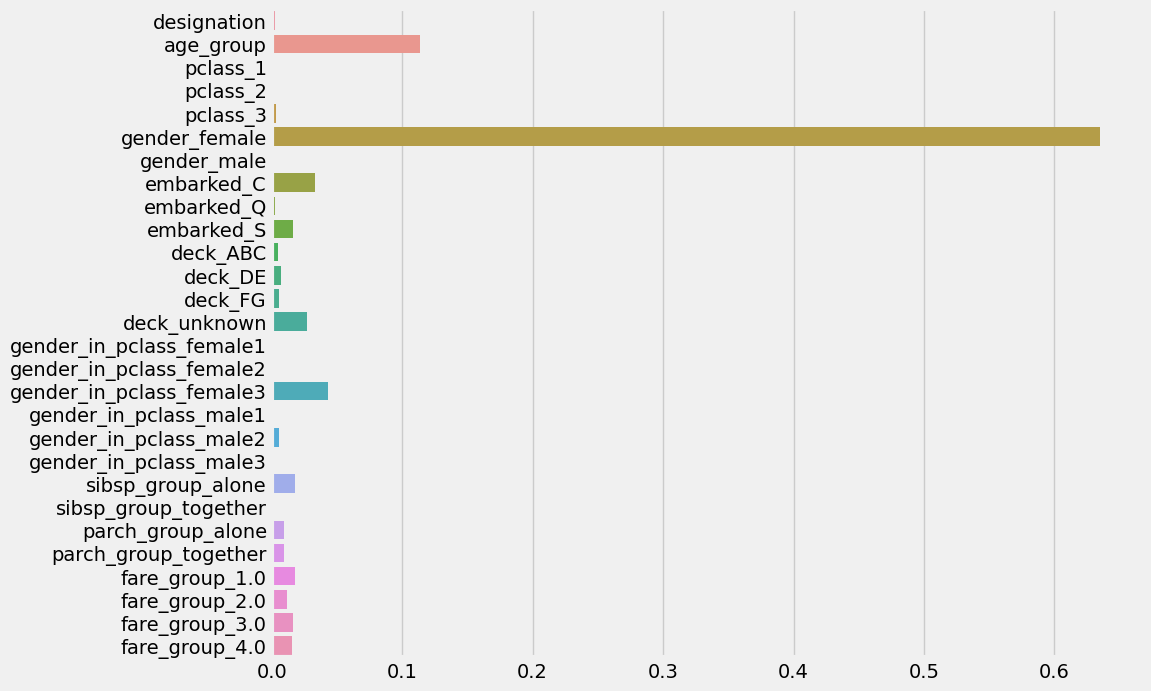

In [151]:
plt.figure(figsize=(10,8))
sns.barplot(x=dtc.feature_importances_, y=X_tr.columns)
plt.show()

## Gradiant Boosting

In [154]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(random_state=args.random_state).fit(X_tr, y_tr)
print(f'훈련용 평가지표: {gbc.score(X_tr, y_tr)} / 테스트용 평가지표: {gbc.score(X_te, y_te)}')

훈련용 평가지표: 0.894808743169399 / 테스트용 평가지표: 0.8315217391304348


In [155]:
from sklearn.metrics import roc_curve, auc 

y_pred_dtc = gbc.predict_proba(X_te)[:,1]
fpr, tpr, thresholds = roc_curve(y_te,y_pred_dtc)
auc_te = auc(fpr, tpr)
print(f'model: {auc_te}')

model: 0.8800751879699248


### StratifiedKFold

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbc_kf = GradientBoostingClassifier(**hp).fit(X_tr, y_tr)

In [ ]:
# 교차 검증
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=args.random_state)

In [ ]:
from sklearn.model_selection import cross_val_score

# 교차 검증
scores = cross_val_score(gbc_kf, X_tr, y_tr, scoring='accuracy', cv=5)
print(f'각 검증 별 점수: \n{pd.Series(scores)}')
print(f'교차 검증 평균 점수: {np.mean(scores)}')

In [ ]:
from sklearn.model_selection import cross_validate

# 교차 검증
result = cross_validate(gbc_kf, X_tr, y_tr, scoring='accuracy', cv=5, return_train_score=True)
print(f'각 검증 결과: \n: {pd.DataFrame(result)}')

### Apply Standard Saclier

In [156]:
from sklearn.preprocessing import StandardScaler

stdscaler = StandardScaler().fit(X_tr)

X_tr_std_scaled = stdscaler.fit_transform(X_tr)
X_te_std_scaled = stdscaler.transform(X_te)

In [158]:
from sklearn.ensemble import GradientBoostingClassifier

gbc_scaled = GradientBoostingClassifier(random_state=args.random_state).fit(X_tr_std_scaled, y_tr)
print(f'훈련용 평가지표: {gbc_scaled.score(X_tr_std_scaled, y_tr)} / 테스트용 평가지표: {gbc_scaled.score(X_te_std_scaled, y_te)}')

훈련용 평가지표: 0.894808743169399 / 테스트용 평가지표: 0.8315217391304348


In [159]:
from sklearn.metrics import roc_curve, auc 

y_pred_dtc = gbc_scaled.predict_proba(X_te_std_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_te,y_pred_dtc)
auc_te = auc(fpr, tpr)
print(f'model: {auc_te}')

model: 0.8800751879699248


### Apply Robust Scalier

In [160]:
from sklearn.preprocessing import RobustScaler

rbs = RobustScaler().fit(X_tr)

X_tr_rb_scaled = rbs.fit_transform(X_tr)
X_te_rb_scaled = rbs.transform(X_te)

In [161]:
from sklearn.ensemble import GradientBoostingClassifier

gbc_rb_scaled = GradientBoostingClassifier(random_state=args.random_state).fit(X_tr_rb_scaled, y_tr)
print(f'훈련용 평가지표: {gbc_rb_scaled.score(X_tr_rb_scaled, y_tr)} / 테스트용 평가지표: {gbc_rb_scaled.score(X_te_rb_scaled, y_te)}')

훈련용 평가지표: 0.894808743169399 / 테스트용 평가지표: 0.8315217391304348


In [162]:
from sklearn.metrics import roc_curve, auc 

y_pred_dtc = gbc_rb_scaled.predict_proba(X_te_rb_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_te,y_pred_dtc)
auc_te = auc(fpr, tpr)
print(f'model: {auc_te}')

model: 0.8800751879699248


## GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

# 탐색 범위 정의
grid_search = {
    'max_depth': [1,2,3,4,5],
    'n_estimators': [20, 50, 100, 150, 200, 300, 500],
    'learning_rate' : [0.1, 0.2, 0.3, 0.4, 0.5]
}

gbc = GradientBoostingClassifier(**hp).fit(X_tr, y_tr)
grid = GridSearchCV(estimator = gbc, param_grid = grid_search, cv = 4, verbose= 5, n_jobs = -1)
grid.fit(X_tr, y_tr)

grid_pf = grid.best_estimator_.predict(X_tr)
y_pred_gbc = grid.predict_proba(X_te)[:,1]
fpr, tpr, thresholds = roc_curve(y_te,y_pred_gbc)
auc_te = auc(fpr, tpr)

print(grid.best_params_)
print(auc_te)

In [ ]:
y_pred_grid = grid.predict_proba(X_te)[:,1]
fpr, tpr, thresholds = roc_curve(y_te,y_pred_grid)
auc_te = auc(fpr, tpr)
print(f'model: {auc_te}')

## XGBoost

In [163]:
from xgboost import XGBClassifier, plot_importance

# Submission

In [ ]:
submission = pd.read_csv(args.submission_csv)
print(f'{submission.shape}')
submission.head()

## Gradient Boosting Result

In [ ]:
test_pred = gbc.predict_proba(test)[:, 1]
test_pred.shape

In [ ]:
submission['survived'] = test_pred
submission.head()

In [ ]:
# submission.to_csv(args.default_path+"submission_retry_10.csv", header=True, index=False)

## Gradient Boosting Result with Standard Scalier

In [ ]:
test_scalied_pred = gbc_scaled.predict_proba(test)[:, 1]
test_scalied_pred.shape

In [ ]:
submission['survived'] = test_scalied_pred
submission.head()

In [ ]:
# submission.to_csv(args.default_path+"submission_retry_11.csv", header=True, index=False)

## GridSearch

In [ ]:
test_gs_pred = grid.predict_proba(test)[:, 1]
test_gs_pred.shape

In [ ]:
submission['survived'] = test_scalied_pred
submission.head()

In [ ]:
# submission.to_csv(args.default_path+"submission_retry_13.csv", header=True, index=False)